### Aim: The dataset is hosted by city of Los Angeles named as "Metro Bike Share Trip Data". I will be analyzing the use of metro bikes in order to build a bike network that really works.

# Introduction
This dataset is a catalogue of rides taken on the LA-Metro Bike Share Network.The Metro Bike Share system makes bikes available 24/7, 365 days a year in Downtown LA, Central LA, Port of LA and the Westside. Metro Bike Share offers convenient round-the-clock access to a fleet of bicycles for short trips. Metro Bike Share is one of LA Metro's multiple public transportation options for Angelenos and visitors to get around.

Feature descriptions from https://bikeshare.metro.net/about/data/

* trip_id: Locally unique integer that identifies the trip

* duration: Length of trip in seconds

* start_time: The date/time when the trip began, presented in ISO 8601 format in local time

* end_time: The date/time when the trip ended, presented in ISO 8601 format in local time

* start_station: The station ID where the trip originated

* start_lat: The latitude of the station where the trip originated

* start_lon: The longitude of the station where the trip originated

* end_station: The station ID where the trip terminated

* end_lat: The latitude of the station where the trip terminated

* end_lon: The longitude of the station where the trip terminated

* bike_id: Locally unique integer that identifies the bike

* plan_duration: The number of days that the plan the passholder is using entitles them to ride; 0 is used for a single ride plan (Walk-up)

* trip_route_category: "Round Trip" for trips starting and ending at the same station or "One Way" for all other trips

* passholder_type: The name of the passholder's plan

Other features are not officially described by Metro Bike Share

Remaining features appear to be LA geographic information which i think is not relevant to my analysis, many of which include large amounts of missing data. So i have dropped those columns.

In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Zara' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import pandas as pd
#import folium
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from Ronak_Somani_Capstone_Project_Code import distance_on_unit_sphere
#from Ronak_Somani_Capstone_Project_Code import modeling_techniques_and_prediction

# Data Extraction

In [7]:
metro_bike_trip_df =  pd.read_csv("metro-bike-share-trip-data.csv")
metro_bike_trip_df.head(6)

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,...,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
0,18222186,15060,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9518671,77160,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,NaN,NaN,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20444932,86400,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20905031,18840,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21031476,86400,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,...,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9378284,60,2016-10-09T09:40:00.000,2016-10-09T09:41:00.000,NaN,NaN,NaN,NaN,NaN,NaN,...,One Way,Staff Annual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Replacing the column name space with "_" for easier name conversion
metro_bike_trip_df.columns = metro_bike_trip_df.columns.str.replace(' ','_')
metro_bike_trip_df.head(5)

,Trip_ID,Duration,Start_Time,End_Time,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,...,Trip_Route_Category,Passholder_Type,Starting_Lat-Long,Ending_Lat-Long,Neighborhood_Councils_(Certified),Council_Districts,Zip_Codes,LA_Specific_Plans,Precinct_Boundaries,Census_Tracts
0,18222186,15060,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9518671,77160,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,NaN,NaN,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20444932,86400,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20905031,18840,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21031476,86400,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,...,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
metro_bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 22 columns):
Trip_ID                              132427 non-null int64
Duration                             132427 non-null int64
Start_Time                           132427 non-null object
End_Time                             132427 non-null object
Starting_Station_ID                  132408 non-null float64
Starting_Station_Latitude            132379 non-null float64
Starting_Station_Longitude           132379 non-null float64
Ending_Station_ID                    132331 non-null float64
Ending_Station_Latitude              131376 non-null float64
Ending_Station_Longitude             131376 non-null float64
Bike_ID                              132417 non-null float64
Plan_Duration                        131661 non-null float64
Trip_Route_Category                  132427 non-null object
Passholder_Type                      132427 non-null object
Starting_Lat-Long                    98622 

In [10]:
print("shape:", metro_bike_trip_df.shape)

shape: (132427, 22)


In [11]:
# Changing Start and End Time values to datetime format
metro_bike_trip_df['Start_Time']=pd.to_datetime(metro_bike_trip_df['Start_Time'])
metro_bike_trip_df['End_Time']=pd.to_datetime(metro_bike_trip_df['End_Time'])
metro_bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 22 columns):
Trip_ID                              132427 non-null int64
Duration                             132427 non-null int64
Start_Time                           132427 non-null datetime64[ns]
End_Time                             132427 non-null datetime64[ns]
Starting_Station_ID                  132408 non-null float64
Starting_Station_Latitude            132379 non-null float64
Starting_Station_Longitude           132379 non-null float64
Ending_Station_ID                    132331 non-null float64
Ending_Station_Latitude              131376 non-null float64
Ending_Station_Longitude             131376 non-null float64
Bike_ID                              132417 non-null float64
Plan_Duration                        131661 non-null float64
Trip_Route_Category                  132427 non-null object
Passholder_Type                      132427 non-null object
Starting_Lat-Long          

# Data Cleaning

In [12]:
# Finding the null values in each column
metro_bike_trip_df.isnull().sum()

Trip_ID                                   0
Duration                                  0
Start_Time                                0
End_Time                                  0
Starting_Station_ID                      19
Starting_Station_Latitude                48
Starting_Station_Longitude               48
Ending_Station_ID                        96
Ending_Station_Latitude                1051
Ending_Station_Longitude               1051
Bike_ID                                  10
Plan_Duration                           766
Trip_Route_Category                       0
Passholder_Type                           0
Starting_Lat-Long                     33805
Ending_Lat-Long                        1051
Neighborhood_Councils_(Certified)     33837
Council_Districts                     33837
Zip_Codes                             33837
LA_Specific_Plans                    116590
Precinct_Boundaries                    1099
Census_Tracts                          1099
dtype: int64

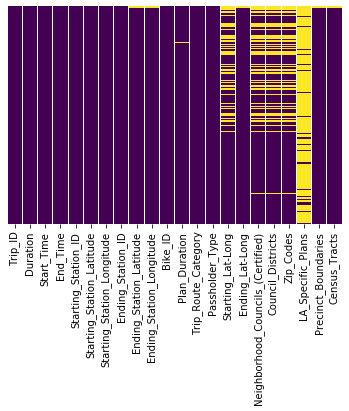

In [13]:
# Visually representing the null values of different columns using heatmap
sns.heatmap(metro_bike_trip_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
# Dropping below columns due to lack of data and more of null values
metro_bike_trip_df.drop(columns=['Neighborhood_Councils_(Certified)',
                 'Council_Districts',
                 'Zip_Codes',
                 'LA_Specific_Plans',
                 'Precinct_Boundaries',
                 'Census_Tracts'],
       inplace=True)

In [15]:
# Droping the na values from the metro bike trip data
metro_bike_trip_df = metro_bike_trip_df.dropna()
metro_bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97825 entries, 2088 to 132426
Data columns (total 16 columns):
Trip_ID                       97825 non-null int64
Duration                      97825 non-null int64
Start_Time                    97825 non-null datetime64[ns]
End_Time                      97825 non-null datetime64[ns]
Starting_Station_ID           97825 non-null float64
Starting_Station_Latitude     97825 non-null float64
Starting_Station_Longitude    97825 non-null float64
Ending_Station_ID             97825 non-null float64
Ending_Station_Latitude       97825 non-null float64
Ending_Station_Longitude      97825 non-null float64
Bike_ID                       97825 non-null float64
Plan_Duration                 97825 non-null float64
Trip_Route_Category           97825 non-null object
Passholder_Type               97825 non-null object
Starting_Lat-Long             97825 non-null object
Ending_Lat-Long               97825 non-null object
dtypes: datetime64[ns](2), float6

In [1]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


#Function used to calculate the distance between the starting and ending location
def distance_on_unit_sphere(lat1, long1, lat2, long2):
    degrees_to_radians = math.pi / 181.0
    phi1 = (90.0 - lat1) * degrees_to_radians
    phi2 = (90.0 - lat2) * degrees_to_radians

    theta1 = long1 * degrees_to_radians
    theta2 = long2 * degrees_to_radians

    a = ((math.sin(phi1) * math.sin(phi2) * math.cos(theta1 - theta2)) + (math.cos(phi1) * math.cos(phi2)))
    if a > 1:
        a = 0.999999
    dis = math.acos(a)
    return dis * 6374


#Function to define different modelling technique for predicting the number of of passholder for each type
def modeling_techniques_and_prediction(df, passholder_type, model_type):
    X = df.drop(passholder_type, axis=1)
    y = df[passholder_type]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    if model_type == 'logistic':
        lr = LogisticRegression()
        model_fit = lr.fit(X_train, y_train)
        pred1 = lr.predict(X_test)
        print(model_fit)
        print("\n The classification report for Logistic Regression is: \n", classification_report(y_test, pred1))
        print("The Confusion Matrix for Logistic Regression is: \n", confusion_matrix(y_test, pred1))

    elif model_type == 'random':
        clf = RandomForestClassifier()
        model_fit = clf.fit(X_train, y_train)
        pred1 = clf.predict(X_test)
        print(model_fit)
        print("\n The classification report for Random Forest is: \n", classification_report(y_test, pred1))
        print("The Confusion Matrix for Random Forest is: \n", confusion_matrix(y_test, pred1))

    else:
        clf2 = DecisionTreeClassifier()
        model_fit = clf2.fit(X_train, y_train)
        pred1 = clf2.predict(X_test)
        print(model_fit)
        print("\n The classification report for Decision Tree is: \n", classification_report(y_test, pred1))
        print("The Confusion Matrix for Decision Tree is: \n", confusion_matrix(y_test, pred1))

In [16]:
# Change format of station and bike ID's to integer.
metro_bike_trip_df['Starting_Station_ID'] = metro_bike_trip_df.Starting_Station_ID.astype(int)
metro_bike_trip_df['Ending_Station_ID'] = metro_bike_trip_df.Ending_Station_ID.astype(int)
metro_bike_trip_df['Bike_ID'] = metro_bike_trip_df.Bike_ID.astype(int)
metro_bike_trip_df.head(5)

,Trip_ID,Duration,Start_Time,End_Time,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,Bike_ID,Plan_Duration,Trip_Route_Category,Passholder_Type,Starting_Lat-Long,Ending_Lat-Long
2088,2023364,1980,2016-07-08 09:24:00,2016-07-08 09:57:00,3045,34.028511,-118.25667,3045,34.028511,-118.25667,5833,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.25667', 'latitude': '34.02...","{'longitude': '-118.25667', 'latitude': '34.02..."
2089,2027211,180,2016-07-08 10:40:00,2016-07-08 10:43:00,4108,0.000000,0.00000,4108,0.000000,0.00000,6065,30.0,Round Trip,Monthly Pass,"{'longitude': '0.0', 'latitude': '0.0'}","{'longitude': '0.0', 'latitude': '0.0'}"
2090,2035311,780,2016-07-08 12:42:00,2016-07-08 12:55:00,3029,34.048851,-118.24642,3029,34.048851,-118.24642,6011,0.0,Round Trip,Walk-up,"{'longitude': '-118.24642', 'latitude': '34.04...","{'longitude': '-118.24642', 'latitude': '34.04..."
2091,2182651,4440,2016-07-09 19:08:00,2016-07-09 20:22:00,3045,34.028511,-118.25667,3045,34.028511,-118.25667,6623,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.25667', 'latitude': '34.02...","{'longitude': '-118.25667', 'latitude': '34.02..."
2092,2286870,5220,2016-07-10 10:56:00,2016-07-10 12:23:00,3045,34.028511,-118.25667,3045,34.028511,-118.25667,6210,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.25667', 'latitude': '34.02...","{'longitude': '-118.25667', 'latitude': '34.02..."


In [17]:
# Now we will find the total number of stations and total number of bikes 
print("Total number of Starting stations:", metro_bike_trip_df.Starting_Station_ID.nunique())
print("Total number of Ending stations:", metro_bike_trip_df.Ending_Station_ID.nunique())
print("Total number of bikes:",metro_bike_trip_df.Bike_ID.nunique())

Total number of Starting stations: 64
Total number of Ending stations: 64
Total number of bikes: 762


# Performing Exploratory Data Analysis for the Bike Trip Data

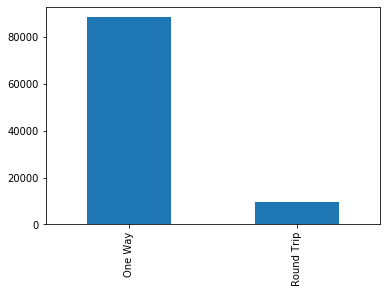

In [18]:
# Finding the trip route category and ploting it in the form of bar graph
metro_bike_trip_df.Trip_Route_Category.value_counts().plot(kind='bar')
plt.show()

# Visualisation


In [19]:
metro_bike_trip_df.head()

,Trip_ID,Duration,Start_Time,End_Time,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,Bike_ID,Plan_Duration,Trip_Route_Category,Passholder_Type,Starting_Lat-Long,Ending_Lat-Long
2088,2023364,1980,2016-07-08 09:24:00,2016-07-08 09:57:00,3045,34.028511,-118.25667,3045,34.028511,-118.25667,5833,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.25667', 'latitude': '34.02...","{'longitude': '-118.25667', 'latitude': '34.02..."
2089,2027211,180,2016-07-08 10:40:00,2016-07-08 10:43:00,4108,0.000000,0.00000,4108,0.000000,0.00000,6065,30.0,Round Trip,Monthly Pass,"{'longitude': '0.0', 'latitude': '0.0'}","{'longitude': '0.0', 'latitude': '0.0'}"
2090,2035311,780,2016-07-08 12:42:00,2016-07-08 12:55:00,3029,34.048851,-118.24642,3029,34.048851,-118.24642,6011,0.0,Round Trip,Walk-up,"{'longitude': '-118.24642', 'latitude': '34.04...","{'longitude': '-118.24642', 'latitude': '34.04..."
2091,2182651,4440,2016-07-09 19:08:00,2016-07-09 20:22:00,3045,34.028511,-118.25667,3045,34.028511,-118.25667,6623,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.25667', 'latitude': '34.02...","{'longitude': '-118.25667', 'latitude': '34.02..."
2092,2286870,5220,2016-07-10 10:56:00,2016-07-10 12:23:00,3045,34.028511,-118.25667,3045,34.028511,-118.25667,6210,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.25667', 'latitude': '34.02...","{'longitude': '-118.25667', 'latitude': '34.02..."


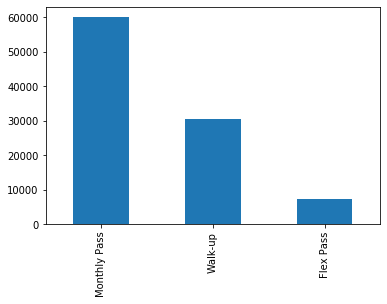

In [21]:
#Passholder type count 
metro_bike_trip_df.Passholder_Type.value_counts().plot(kind='bar')
plt.show()

In [28]:
df= metro_bike_trip_df

In [29]:
df.describe()


,Trip_ID,Duration,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,Bike_ID,Plan_Duration
count,9.782500e+04,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000
mean,8.451612e+06,1362.284896,3042.024626,34.036437,-118.211316,3041.553274,34.030414,-118.191661,6193.698451,45.319244
std,4.111924e+06,4679.233275,29.756843,0.615729,2.138390,33.035783,0.754025,2.618753,291.605995,91.195493
min,1.912818e+06,60.000000,3005.000000,0.000000,-118.270813,3005.000000,0.000000,-118.270813,4727.000000,0.000000
25%,5.050101e+06,360.000000,3024.000000,34.044170,-118.256980,3022.000000,34.044159,-118.256980,5957.000000,0.000000
50%,7.086248e+06,600.000000,3038.000000,34.046822,-118.250954,3038.000000,34.046810,-118.251579,6186.000000,30.000000
75%,1.195715e+07,1080.000000,3063.000000,34.050880,-118.241562,3063.000000,34.050480,-118.238937,6431.000000,30.000000
max,1.710164e+07,86400.000000,4108.000000,34.064281,0.000000,4108.000000,34.064281,0.000000,6728.000000,365.000000


In [56]:
#Trip duration scatter plot
#df.Duration.plot(kind='bar')
#plt.show()

In [75]:
#Using pandas plot function to show top 15 starting station IDs with trips of highest duration

plt_dn_startID = df.groupby('Starting_Station_ID')['Duration'].mean().sort_values().tail(15)

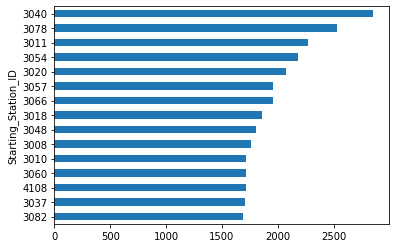

In [76]:
plt_dn_startID.plot(kind= 'barh')

In [89]:
#Stations 3040, 3078, 3011, 3054, and 3020 can be seen to have the longest bike rides of >2000 seconds. 

In [84]:
#Using pandas plot function to show top 15 bike IDs with trips of highest duration

plt_dn_bikeID = df.groupby('Bike_ID')['Duration'].mean().sort_values().tail(15)

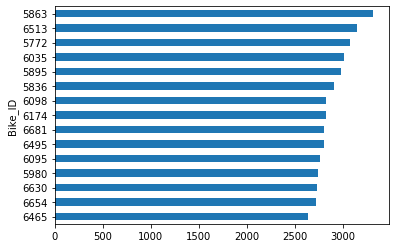

In [86]:
plt_dn_bikeID.plot(kind= 'barh')

In [ ]:
#Bike ID's 5863, 6513, 5772, 6035 have the trips with highest duration of approx. 3000 seconds 

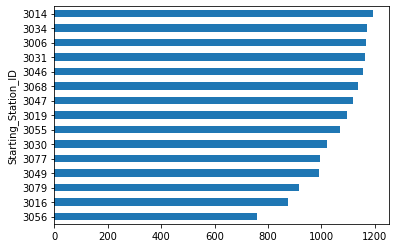

In [88]:
#starting station ID with least duration trips 
plt_dn_start_stn_head = df.groupby('Starting_Station_ID')['Duration'].mean().sort_values().head(15)
plt_dn_start_stn_head.plot(kind= 'barh')

In [ ]:
#starting station ID's 3014, 3034, 3006, 3031, 3046 have the lowest trip durations of 1200 seconds and less. 

In [63]:
date_formats = df.Start_Time: ['%Y/%m/%d %H:%M:%S']

SyntaxError: invalid syntax (<ipython-input-63-0573e1b860ef>, line 1)

In [111]:
#extract popular hour of day or time period 14h-16 hr by groupby
#extract popular days of week using calender function

#date_formats = df.Start_Time: ['%Y/%m/%d %H:%M:%S']
#split into hr

In [ ]:
import geopandas
import geopy.distance

def calc_distance(x):
    end_coords = (df.Ending_Station_Latitude, df.Ending_Station_Longitude)
    start_coords = (df.Starting_Station_Latitude, df.Starting_Station_Longitude)
    return geopy.distance.vincenty(site_coords, place2_coords )).km
df.apply(calc_distance, axis = 1)

{'whiskers': [<matplotlib.lines.Line2D at 0x26262619cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x2626267a780>,
 'boxes': [<matplotlib.lines.Line2D at 0x2626260da58>],
 'medians': [<matplotlib.lines.Line2D at 0x262626bdac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x262626e4940>],
 'means': []}

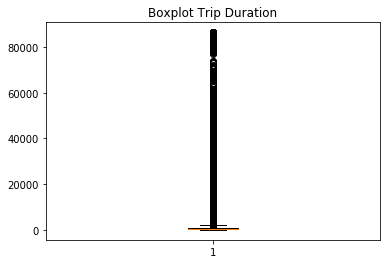

In [36]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot Trip Duration')
ax1.boxplot(df.Duration)

In [ ]:
# Demonstrate how to obtain the hour of the status data.
print(df.durationtime.iloc[1])
print(int(df.durationtime.iloc[1].split()[1].split(':')[0]))

# Predictive Modeling 

In [99]:
import sklearn

In [108]:
 
from sklearn.cluster import KMeans
# Use clustering techniques to plot locations.
b_startloc = df[['Starting_Station_Latitude', 'Starting_Station_Longitude']] # b_loc: bike locations
b_startloc


,Starting_Station_Latitude,Starting_Station_Longitude
2088,34.028511,-118.25667
2089,0.000000,0.00000
2090,34.048851,-118.24642
2091,34.028511,-118.25667
2092,34.028511,-118.25667
2093,0.000000,0.00000
2094,34.063179,-118.24588
2095,0.000000,0.00000
2096,34.048851,-118.24642
2097,0.000000,0.00000


In [109]:
# Use KMeans to find the clusters with the number of 3 and 5.
## fig, axes = plt.subplots(1, 2, figsize=(10,5))

# using three cluster centers:
kmeans_3 = KMeans(n_clusters=3, random_state=random_state.fit(b_startloc)
## mg.discrete_scatter(b_loc['lat'], b_loc['long'], kmeans_3.labels_, ax=axes[0])

# using five cluster centers:
kmeans_5 = KMeans(n_clusters=5, random_state=random_state.fit(b_startloc)
## mg.discrete_scatter(b_loc['lat'], b_loc['long'], kmeans_5.labels_, ax=axes[1])

## 
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-109-c1f7a2ddd8b0>, line 9)

In [110]:
## estimating trip distance 
#start station lat long and end station lat long 


In [ ]:
data['distance'] = data.apply(lambda row: distance(row['start location'], row['end location']).miles, axis=1)